In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### 1. Load The Data 

In [2]:
data = pd.read_csv('boston.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 2. Split Data (Train, Validation, Test)

In [3]:
# Defining the target and feature, target = medv
feature = data.drop(columns='medv')
target = data['medv']

In [4]:
# split the data into train, validate, test 
from sklearn.model_selection import train_test_split

feature_pretrain_data, feature_test_data, target_pretrain_data, target_test_data = train_test_split(feature, target, test_size= 0.2, random_state= 53)
feature_train_data, feature_validate_data, target_train_data, target_validate_data = train_test_split(feature_pretrain_data, target_pretrain_data, test_size= 0.2, random_state= 52)

In [5]:
# calculate vif score 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

x = add_constant(feature_train_data)
vif_df = pd.DataFrame([vif(x.values, i) for i in range(x.shape[1])], index=x.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.788472
2,zn,2.467090
3,indus,4.722670
4,chas,1.091597
5,nox,4.726355
6,rm,1.866751
7,age,3.200367
8,dis,4.033914
9,rad,7.032778
10,tax,8.914045


Feature that Highly correlated (VIF > 5) : 
1. tax
2. rad

### 3. Correlation Plot

<AxesSubplot:>

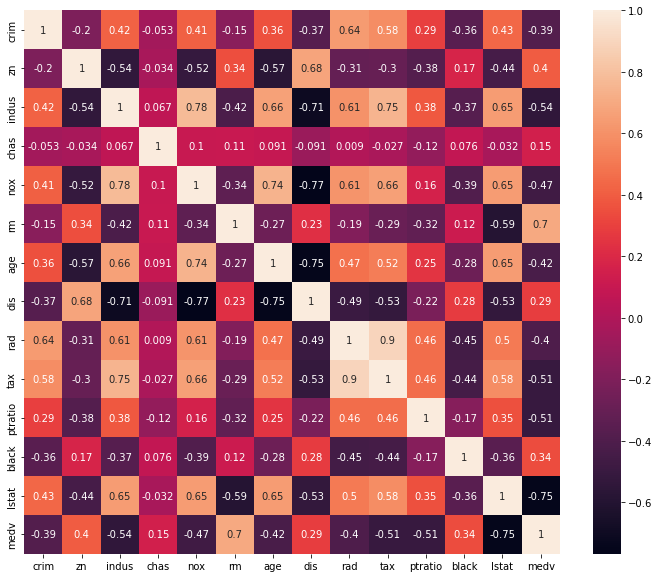

In [6]:
# analyse the training data 
data_train = pd.concat([feature_train_data, target_train_data], axis = 1)
train_corr = data_train.corr()
plt.figure(figsize = (12,10))
sns.heatmap(train_corr, annot=True)

Based on this heatmap, i want to retain rad and drop tax from feature

In [7]:
feature_train_data = feature_train_data.drop(columns= 'tax')
feature_test_data = feature_test_data.drop(columns= 'tax')
feature_validate_data = feature_validate_data.drop(columns= 'tax')

In [8]:
# recheck the data
feature_train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat
290,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,19.2,396.90,3.33
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,18.9,396.21,8.10
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,18.6,394.96,7.73
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,21.0,232.60,27.71
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,15.2,396.90,5.39


### 4. Fit Data on The Train Data

In [9]:
# lambda = [0.01, 0.1, 1, 10] 

In [10]:
# defining x and y data train
x_data_train = feature_train_data.to_numpy()
y_data_train = target_train_data.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train),)

#### A. Ridge

In [11]:
from sklearn.linear_model import Ridge
# Define the model 
ridge_reg_pointzeroone = Ridge(alpha = 0.01, random_state=52)
ridge_reg_pointone = Ridge(alpha = 0.1, random_state=52)
ridge_reg_one = Ridge(alpha = 1, random_state=52)
ridge_reg_ten = Ridge(alpha=10, random_state=52)

# fit the model 
ridge_reg_pointzeroone.fit(x_data_train, y_data_train)
ridge_reg_pointone.fit(x_data_train, y_data_train)
ridge_reg_one.fit(x_data_train, y_data_train)
ridge_reg_ten.fit(x_data_train, y_data_train)

Ridge(alpha=10, random_state=52)

#### B. LASSO

In [12]:
from sklearn.linear_model import Lasso
# Define the model 
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=52)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=52)
lasso_reg_one = Lasso(alpha=1, random_state=52)
lasso_reg_ten = Lasso(alpha=10, random_state=52)

#fit the model 
lasso_reg_pointzeroone.fit(x_data_train, y_data_train)
lasso_reg_pointone.fit(x_data_train, y_data_train)
lasso_reg_one.fit(x_data_train, y_data_train)
lasso_reg_ten.fit(x_data_train, y_data_train)

Lasso(alpha=10, random_state=52)

### 5. Choose The Best Lambda

In [13]:
from sklearn.metrics import mean_squared_error
alphas = [0.01, 0.1, 1, 10]

# defining x and y data validation 
x_data_validation = feature_validate_data.to_numpy()
y_data_validation = target_validate_data.to_numpy()
y_data_validation = y_data_validation.reshape(len(y_data_validation),)

#### A. Ridge 

In [14]:
# modelling based on validation data
models_ridge = [ridge_reg_pointzeroone, ridge_reg_pointone,
              ridge_reg_one, ridge_reg_ten]

In [15]:
for model_ridge, alpha in zip(models_ridge,alphas):
    y_medv_validation_ridge = model_ridge.predict(x_data_validation)
    rmse_ridge = np.sqrt(mean_squared_error(y_data_validation,y_medv_validation_ridge))
    print('RMSE of Ridge model with alpha =', alpha,' is ',rmse_ridge)

RMSE of Ridge model with alpha = 0.01  is  3.8187230938414913
RMSE of Ridge model with alpha = 0.1  is  3.8139513990085914
RMSE of Ridge model with alpha = 1  is  3.804728971631597
RMSE of Ridge model with alpha = 10  is  3.8548006201947467


#### B. LASSO

In [16]:
# modelling based on validation data 
models_lasso = [lasso_reg_pointzeroone, lasso_reg_pointone,
               lasso_reg_one, lasso_reg_ten]

In [17]:
for model_lasso, alpha in zip(models_lasso,alphas):
    y_medv_validation_lasso = model_lasso.predict(x_data_validation)
    rmse_lasso = np.sqrt(mean_squared_error(y_data_validation,y_medv_validation_lasso))
    print('RMSE of LASSO model with alpha =', alpha,' is ',rmse_lasso)
    

RMSE of LASSO model with alpha = 0.01  is  3.8069347793672295
RMSE of LASSO model with alpha = 0.1  is  3.831339862361522
RMSE of LASSO model with alpha = 1  is  4.455651227470317
RMSE of LASSO model with alpha = 10  is  5.904126108704242


Ridge model with alpha = 1 is the best model 

In [18]:
best_model = ridge_reg_one

#### C. Model Evaluation

In [23]:
#create coefficient dataframe
coef_df = pd.DataFrame({
     'feature':['intercept'] + feature_train_data.columns.tolist(),
    'coefficient':[best_model.intercept_] + list(best_model.coef_)
})
coef_df

,feature,coefficient
0,intercept,25.753573
1,crim,-0.130035
2,zn,0.039004
3,indus,-0.145408
4,chas,1.990875
5,nox,-6.712162
6,rm,4.030237
7,age,-0.008529
8,dis,-1.318559
9,rad,0.101550


Diagnostic Study 

In [25]:
from sklearn.metrics import r2_score

y_predict_train = best_model.predict(x_data_train)
print('R-squared training data: {}'.format(r2_score(y_data_train, y_predict_train)))

R-squared training data: 0.7617022653846209


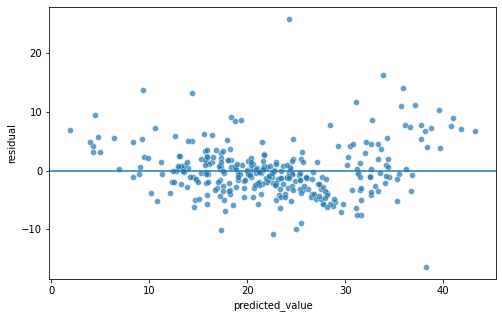

In [33]:
# define residual 
residual = y_data_train - y_predict_train
#create residual dataframe 
df_resid = pd.DataFrame({
     'predicted_value': y_predict_train,
    'residual': residual
})
# plotting
plt.figure(figsize=(8,5))
sns.scatterplot(x = df_resid['predicted_value'], y = df_resid['residual'], alpha = 0.7)
plt.axhline(0)

### 6. Training Error 

In [19]:
y_train_predict = best_model.predict(x_data_train)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [20]:
print('MAE for training data is {}'.format(mean_absolute_error(y_data_train,y_train_predict)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_data_train,y_train_predict)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_data_train,y_train_predict))))

MAE for training data is 3.151174238535841
MAPE for training data is 0.15740860489545824
RMSE for training data is 4.43251368644229


### 7. Testing Error

In [21]:
# defining variables for testing (using test data)
x_data_test = feature_test_data.to_numpy()
y_test_predict = best_model.predict(x_data_test)

# Ground Truth target
y_data_test = target_test_data.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test))

In [22]:
print('MAE for testing data is {}'.format(mean_absolute_error(y_data_test,y_test_predict)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_data_test,y_test_predict)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_data_test,y_test_predict))))

MAE for testing data is 4.098676878037026
MAPE for testing data is 0.20842860015820255
RMSE for testing data is 6.390491254385666


The best model for this dataset is a ridge using MAE(mean absolute error)